## _0. 라이브러리 임포트 

In [4]:
import pandas as pd # python에서의 엑셀과 같은 역할
import numpy as np # 계산을 편하게 해 주는 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt # 시각화
import seaborn as sns # 시각화
import math

import matplotlib.ticker as ticker # 시각화
import matplotlib.dates as mdates # 시각화

import warnings

warnings.filterwarnings('ignore')

sns.set_theme(style='white')
# sns.set(font_scale=2)

# _1. 데이터 불러오기 

In [5]:
%%time
df = pd.read_csv('/content/steam-200k.csv')
df_base = df.copy()

CPU times: user 111 ms, sys: 20 ms, total: 131 ms
Wall time: 161 ms


In [6]:
df_base.head()

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [7]:
df_base.info() # 결측치 없음 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   151603712                   199999 non-null  int64  
 1   The Elder Scrolls V Skyrim  199999 non-null  object 
 2   purchase                    199999 non-null  object 
 3   1.0                         199999 non-null  float64
 4   0                           199999 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.6+ MB


In [8]:
df_base['purchase'].unique().tolist() # 고유값 확인 

['play', 'purchase']

In [9]:
len(df_base['The Elder Scrolls V Skyrim'].unique().tolist()) # 고유값 확인 

5155

In [10]:
print(f"최솟값: {min(df_base['1.0'].tolist())}")
print(f"최댓값: {max(df_base['1.0'].tolist())}")

최솟값: 0.1
최댓값: 11754.0


In [11]:
len(df_base['151603712'].unique().tolist()) # user_id ? 

12393

In [12]:
df_base[df_base['151603712'] == 151603712] # 구매 시점, 플레이 시점에 대한 정보가 없어서 코호트 분석을 하기는 어려울 듯 

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0
...,...,...,...,...,...
60,151603712,HuniePop Original Soundtrack,purchase,1.0,0
61,151603712,The Banner Saga - Mod Content,purchase,1.0,0
62,151603712,The Elder Scrolls V Skyrim - Dawnguard,purchase,1.0,0
63,151603712,The Elder Scrolls V Skyrim - Dragonborn,purchase,1.0,0


In [13]:
df_base.rename(columns = {'151603712':'user_id', 
                          'The Elder Scrolls V Skyrim':'game_title', 
                          'purchase': 'behavior_type',
                          '1.0': 'playtime'}, inplace = True)

In [14]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        199999 non-null  int64  
 1   game_title     199999 non-null  object 
 2   behavior_type  199999 non-null  object 
 3   playtime       199999 non-null  float64
 4   0              199999 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.6+ MB


In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# _2. 파악을 위한 시각화 

In [16]:
df_topten = df_base.groupby(['game_title']).agg(cnts = ('user_id', 'count')).reset_index().\
sort_values(by = 'cnts', ascending = False).head(10)

games_topten = df_topten['game_title'].tolist()

In [17]:
games_topten

['Dota 2',
 'Team Fortress 2',
 'Counter-Strike Global Offensive',
 'Unturned',
 'Left 4 Dead 2',
 'Counter-Strike Source',
 'Counter-Strike',
 "Garry's Mod",
 'The Elder Scrolls V Skyrim',
 'Warframe']

In [18]:
df_play = df_base[ df_base['behavior_type'] =='play' ]
df_play.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70489 entries, 0 to 199998
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        70489 non-null  int64  
 1   game_title     70489 non-null  object 
 2   behavior_type  70489 non-null  object 
 3   playtime       70489 non-null  float64
 4   0              70489 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 3.2+ MB


In [19]:
df_play_v1 = df_play.drop(df_play.columns[4], axis = 1)

In [20]:
df_play_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70489 entries, 0 to 199998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        70489 non-null  int64  
 1   game_title     70489 non-null  object 
 2   behavior_type  70489 non-null  object 
 3   playtime       70489 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.7+ MB


In [21]:
# user_id 고유값 수 
len(df_play['user_id'].unique().tolist())

11350

In [22]:
# game_title 고유값 수 
len(df_play['game_title'].unique().tolist())

3600

In [23]:
# %%time
# fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

# sns.distplot(np.log10(df_play['hours_played']))

# plt.show()

In [24]:
df_play_agg = df_play.groupby(['user_id']).agg(game_cnts = ('game_title', 'nunique'), playtime_sum = ('playtime', 'sum'))

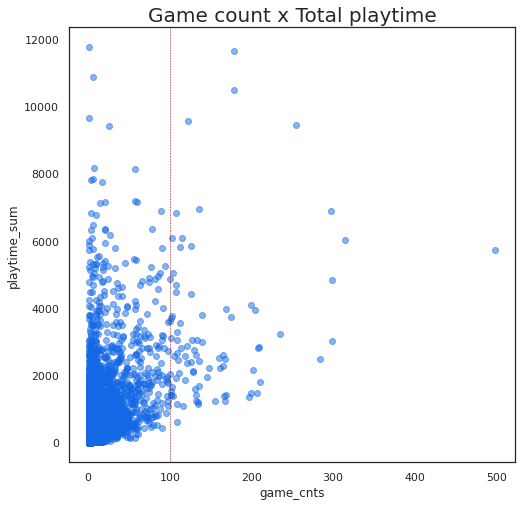

CPU times: user 258 ms, sys: 59.8 ms, total: 317 ms
Wall time: 329 ms


In [25]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8))
plt.scatter(x="game_cnts", y="playtime_sum", data=df_play_agg, alpha = 0.5, color = '#1468E6')

plt.xlabel('game_cnts')
plt.ylabel('playtime_sum')
plt.axvline(100, color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.title(f'Game count x Total playtime', fontsize = 20)

# plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot", y=1.02)
plt.show()

In [26]:
# %%time
# sns.pairplot(df_play)

In [27]:
# np.random.seed(0)
# sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)
# plt.title("요일 별 전체 팁의 Strip Plot")
# plt.show()

# _3. Convert playtime to rating 
두 가지 방법 고민


1.   중앙값 기준 
2.   평균 기준 

outlier가 있는 



In [28]:
df_play_v1.head()

,user_id,game_title,behavior_type,playtime
0,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,play,87.0
4,151603712,Spore,play,14.9
6,151603712,Fallout New Vegas,play,12.1
8,151603712,Left 4 Dead 2,play,8.9


In [29]:
## 중복값 제거 
df_play_v1[df_play_v1['user_id'] == 118664413].sort_values(by = 'game_title')

,user_id,game_title,behavior_type,playtime
15570,118664413,Counter-Strike Global Offensive,play,0.5
15578,118664413,Dota 2,play,0.2
15564,118664413,Grand Theft Auto San Andreas,play,1.9
15576,118664413,Grand Theft Auto San Andreas,play,0.2
15568,118664413,Mirror's Edge,play,0.5
15572,118664413,Need for Speed Hot Pursuit,play,0.5
15574,118664413,Prototype,play,0.3
15566,118664413,Syberia,play,0.6


In [30]:
df_play_v1.shape

(70489, 4)

In [31]:
## 중복값 제거 후
df_play_v1= df_play_v1.groupby(['user_id', 'game_title', 'behavior_type']).agg(playtime = ('playtime', 'sum')).reset_index()

df_play_v1[df_play_v1['user_id'] == 118664413].sort_values(by = 'game_title')

,user_id,game_title,behavior_type,playtime
43937,118664413,Counter-Strike Global Offensive,play,0.5
43938,118664413,Dota 2,play,0.2
43939,118664413,Grand Theft Auto San Andreas,play,2.1
43940,118664413,Mirror's Edge,play,0.5
43941,118664413,Need for Speed Hot Pursuit,play,0.5
43942,118664413,Prototype,play,0.3
43943,118664413,Syberia,play,0.6


In [32]:
df_play_v1.shape

(70477, 4)

In [33]:
df_play_avg = df_play_v1.groupby(['game_title']).agg(playtime_sum = ('playtime', 'sum'), playtime_avg = ('playtime', 'mean')).reset_index()

In [34]:
%%time
df_play_v2 = df_play_v1.merge(df_play_avg, left_on='game_title', right_on='game_title')

CPU times: user 14.6 ms, sys: 1.88 ms, total: 16.4 ms
Wall time: 21.6 ms


In [35]:
df_play_avg[df_play_avg['game_title'] == 'Dirty Bomb']

,game_title,playtime_sum,playtime_avg
878,Dirty Bomb,1390.3,7.129744


In [36]:
df_play_v2.sample(10)

,user_id,game_title,behavior_type,playtime,playtime_sum,playtime_avg
48407,198735293,Dead Island Epidemic,play,1.0,742.0,5.842520
40387,59662830,"Warhammer 40,000 Space Marine",play,114.0,783.0,15.979592
63117,106147454,Infestation Survivor Stories,play,96.0,1953.3,29.153731
1894,144463267,Dota 2,play,1.7,981684.6,202.785499
38377,11149819,Trials 2 Second Edition,play,0.4,23.9,2.987500
44322,309265377,Brawlhalla,play,2.0,458.6,7.055385
46516,66650717,Wargame AirLand Battle,play,50.0,1182.4,42.228571
30580,198914333,Unturned,play,1.5,16096.4,15.057437
30950,299064114,Unturned,play,0.1,16096.4,15.057437
2674,170625356,Dota 2,play,7.4,981684.6,202.785499


In [37]:
# 평균 버전 

%%time
for i in range(1, 5): 
  temp = (20*i) # 20 
  df_play_avg[str(temp)+'%'] = df_play_avg['playtime_avg']* (temp/100) 

df_play_avg.sort_values(by = 'playtime_sum', ascending = False, inplace = True)
df_play_avg.head()

CPU times: user 3.48 ms, sys: 57 µs, total: 3.54 ms
Wall time: 5.2 ms


,game_title,playtime_sum,playtime_avg,20%,40%,60%,80%
922,Dota 2,981684.6,202.785499,40.557100,81.114200,121.671299,162.228399
673,Counter-Strike Global Offensive,322771.6,234.402033,46.880407,93.760813,140.641220,187.521627
2994,Team Fortress 2,173673.3,74.762505,14.952501,29.905002,44.857503,59.810004
670,Counter-Strike,134261.1,236.375176,47.275035,94.550070,141.825106,189.100141
2691,Sid Meier's Civilization V,99821.3,180.182852,36.036570,72.073141,108.109711,144.146282


In [38]:
def q1(x): 
  q1 = x.quantile(0.25)
  return q1

def q2(x): 
  q2 = x.quantile(0.50)
  return q2

def q3(x): 
  q3 = x.quantile(0.75)
  return q3

def iqr(x): 
  return q3(x) - q1(x)

def q4(x): 
  return q3(x) + 1.5*iqr(x)

# def first_border(x): 
#   # return q1(x) - 1.5*iqr(x)
#   return q1(x)

# def last_border(x): 
#   return q3(x) + 1.5*iqr(x)


In [39]:
%%time
df_play_q = df_play_v1.groupby(['game_title']).agg(playtime_sum = ('playtime', 'sum'), 
                                                   Q1 = ('playtime', q1), Q2 = ('playtime', q2), Q3 = ('playtime', q3), Q4 = ('playtime', q4))

df_play_q.sort_values(by = 'playtime_sum', ascending = False, inplace = True)
df_play_q = df_play_q.reset_index()
df_play_q.head()

CPU times: user 11.5 s, sys: 72 ms, total: 11.6 s
Wall time: 11.5 s


,game_title,playtime_sum,Q1,Q2,Q3,Q4
0,Dota 2,981684.6,1.2,5.5,69.0,170.70
1,Counter-Strike Global Offensive,322771.6,11.5,61.0,295.0,720.25
2,Team Fortress 2,173673.3,1.0,4.4,28.0,68.50
3,Counter-Strike,134261.1,1.3,8.8,101.0,250.55
4,Sid Meier's Civilization V,99821.3,9.5,37.0,114.5,272.00


In [40]:
i = df_play_q[df_play_q['game_title'] == 'Dota 2']['Q1'].values[0]


In [41]:
df_play_avg.head() 
# 항상 1점 준 사람 수 = 2점 준 사람 수 = 3점 준 사람 수 = .. 이지 않을 것이므로, 평균으로 선택하자 
# 사용자 간 편차가 클수록, 1점 준 사람 수 & 5점 준 사람 수가 늘어난다고 생각되므로 

,game_title,playtime_sum,playtime_avg,20%,40%,60%,80%
922,Dota 2,981684.6,202.785499,40.557100,81.114200,121.671299,162.228399
673,Counter-Strike Global Offensive,322771.6,234.402033,46.880407,93.760813,140.641220,187.521627
2994,Team Fortress 2,173673.3,74.762505,14.952501,29.905002,44.857503,59.810004
670,Counter-Strike,134261.1,236.375176,47.275035,94.550070,141.825106,189.100141
2691,Sid Meier's Civilization V,99821.3,180.182852,36.036570,72.073141,108.109711,144.146282


In [42]:
df_play_avg['game_title'].tolist()[:5]

['Dota 2',
 'Counter-Strike Global Offensive',
 'Team Fortress 2',
 'Counter-Strike',
 "Sid Meier's Civilization V"]

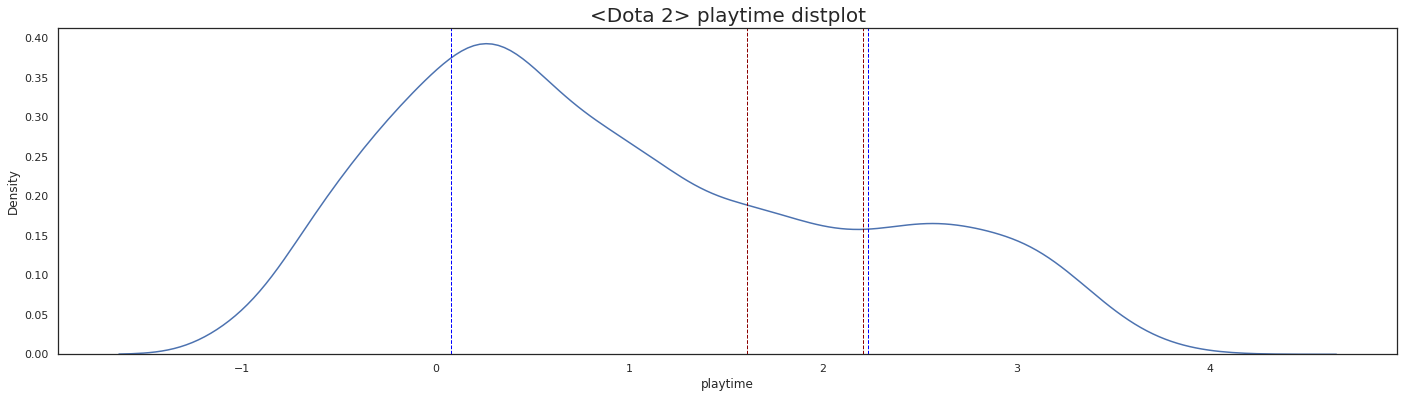

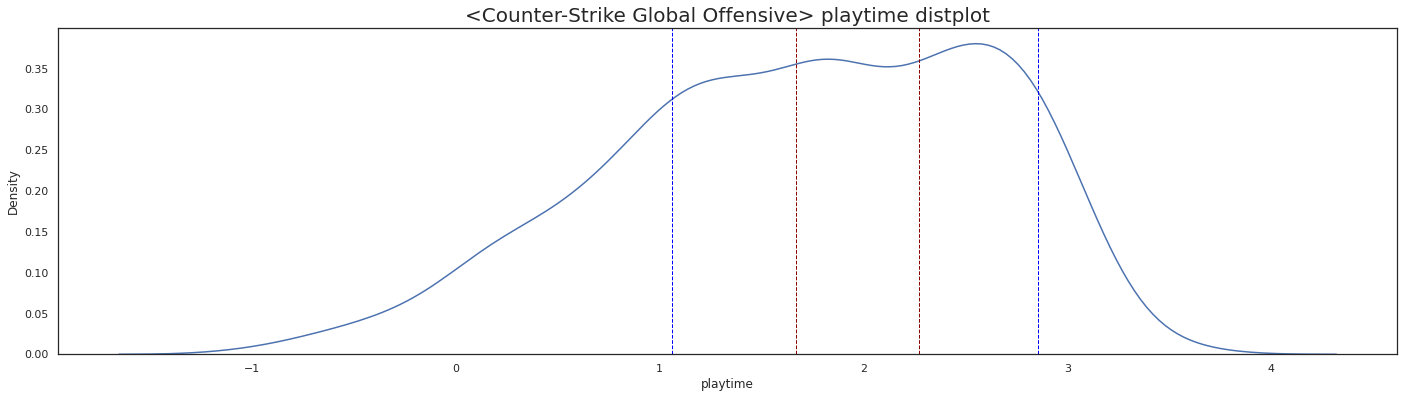

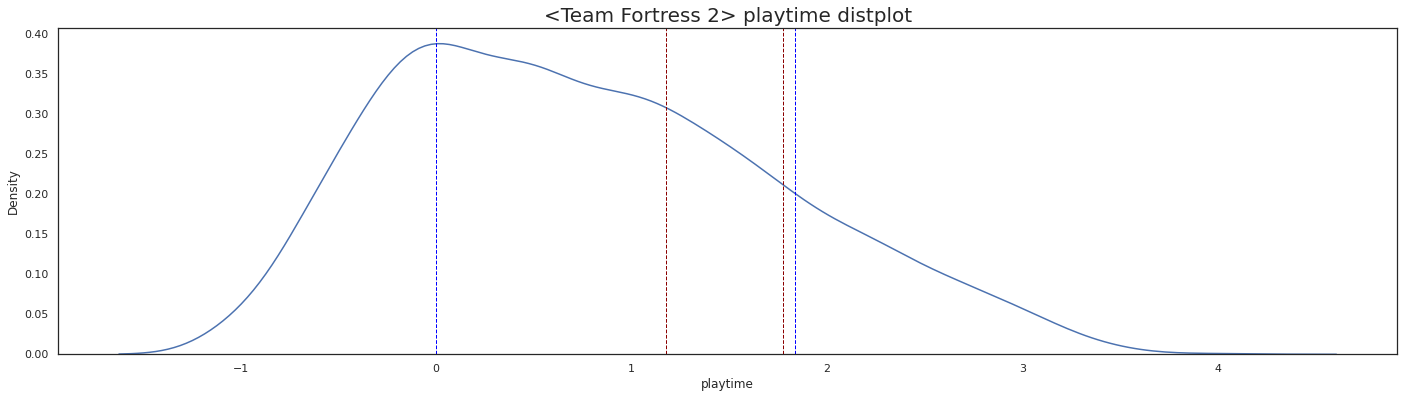

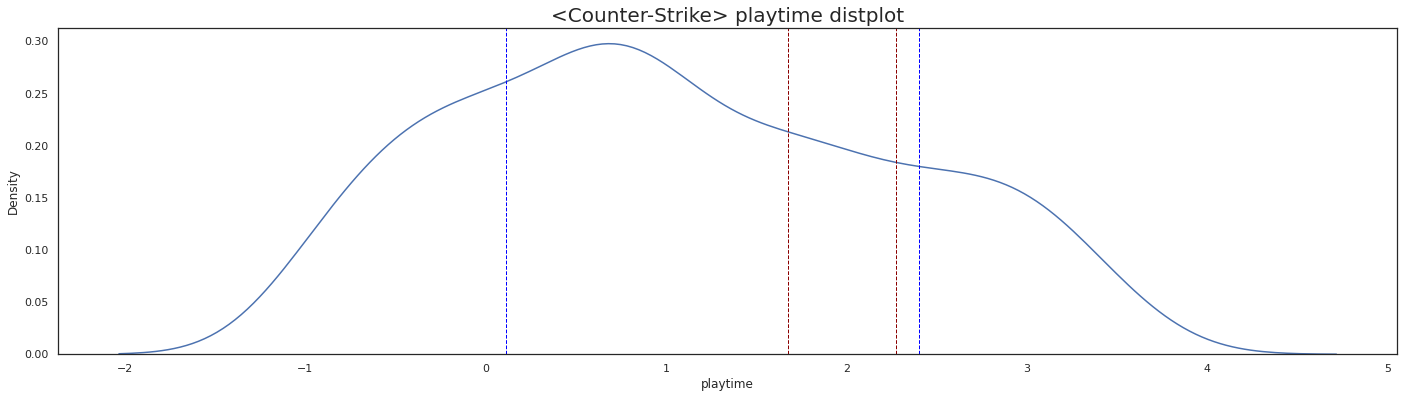

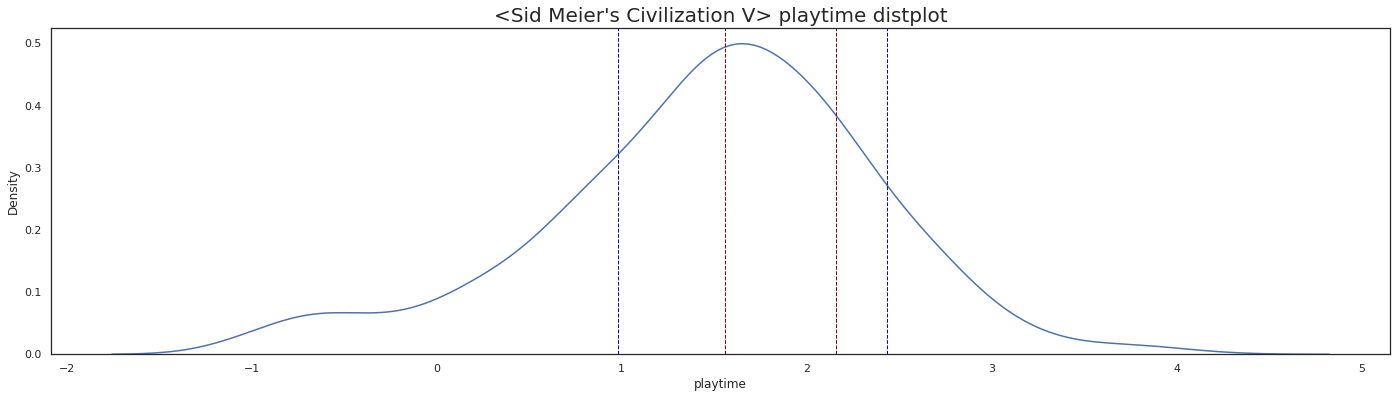

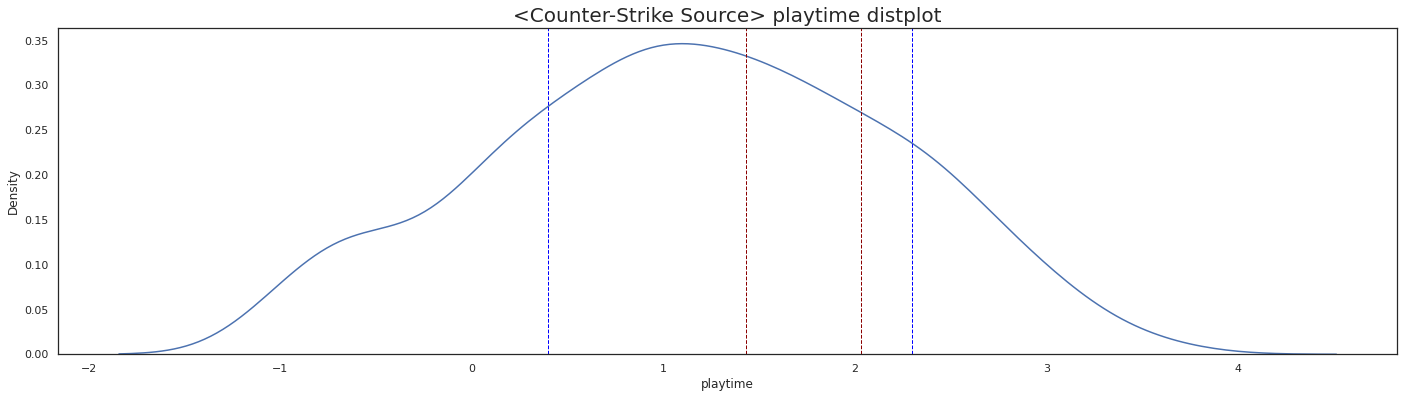

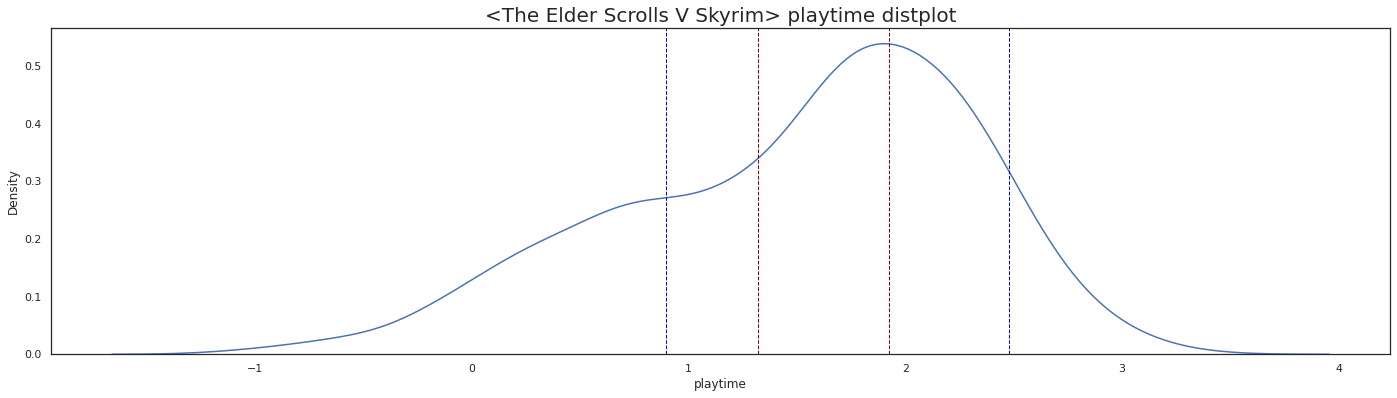

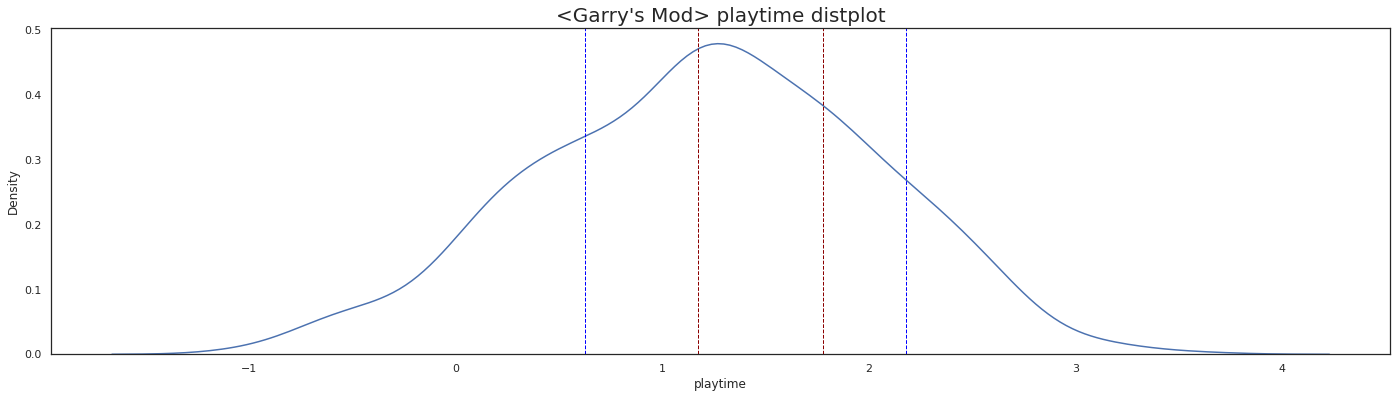

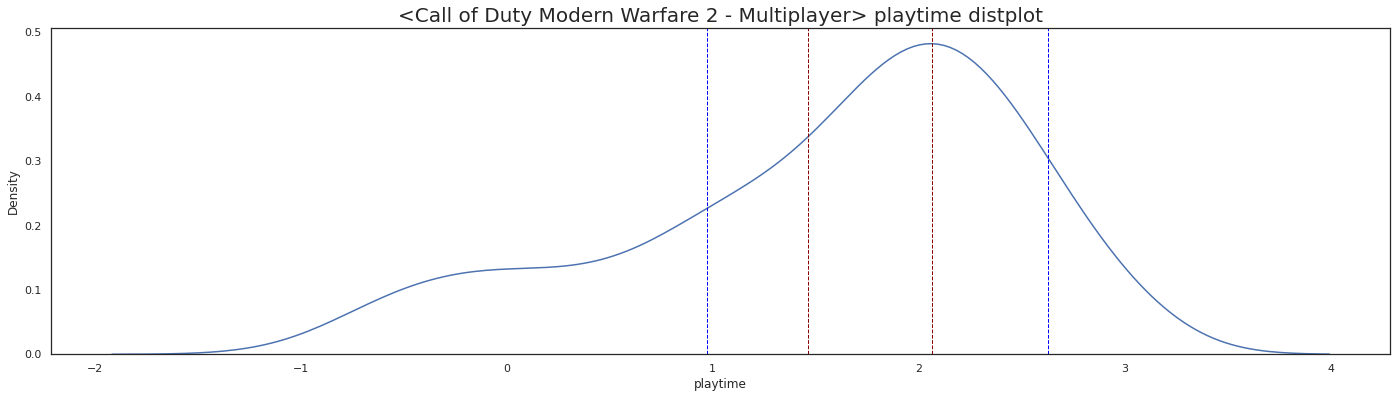

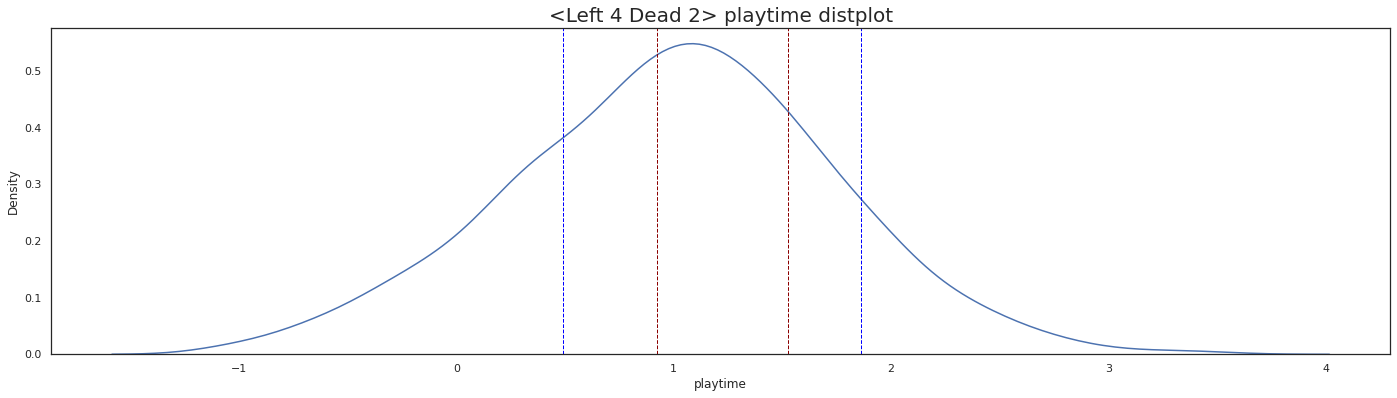

CPU times: user 2.51 s, sys: 1.11 s, total: 3.62 s
Wall time: 2.66 s


In [43]:
%%time
game_list =  df_play_avg['game_title'].tolist()[:10]

for game in game_list: 
  fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

  # game = 'Dota 2'
  df_temp = df_play[df_play['game_title'] == game]

  sns.distplot(np.log10(df_temp['playtime']), hist = False)

  ## 평균 - 1점대와 5점대 line 
  avg1 = df_play_avg[df_play_avg['game_title'] == game]['20%'].values[0]
  avg2 = df_play_avg[df_play_avg['game_title'] == game]['40%'].values[0]
  avg3 = df_play_avg[df_play_avg['game_title'] == game]['60%'].values[0]
  avg4 = df_play_avg[df_play_avg['game_title'] == game]['80%'].values[0]

  plt.axvline(np.log10(avg1), color = 'darkred', linestyle = '--', linewidth = 1.0)
  # plt.axvline(np.log10(avg2), color = 'darkred', linestyle = '--', linewidth = 1.0)
  # plt.axvline(np.log10(avg3), color = 'darkred', linestyle = '--', linewidth = 1.0)
  plt.axvline(np.log10(avg4), color = 'darkred', linestyle = '--', linewidth = 1.0)

  # ## quantile - 1점대와 5점대 line 
  q1 = df_play_q[df_play_q['game_title'] == game]['Q1'].values[0]
  q2 = df_play_q[df_play_q['game_title'] == game]['Q2'].values[0]
  q3 = df_play_q[df_play_q['game_title'] == game]['Q3'].values[0]
  q4 = df_play_q[df_play_q['game_title'] == game]['Q4'].values[0]

  plt.axvline(np.log10(q1), color = 'blue', linestyle = '--', linewidth = 1.0)
  # plt.axvline(np.log10(q2), color = 'blue', linestyle = '--', linewidth = 1.0)
  # plt.axvline(np.log10(q3), color = 'blue', linestyle = '--', linewidth = 1.0)
  plt.axvline(np.log10(q4), color = 'blue', linestyle = '--', linewidth = 1.0)

  ### quantile로 하는 게 나을 듯?? 좀 더 보수적으로 . 

  plt.title(f'<{game}> playtime distplot', fontsize = 20)
  plt.show()

### 평균으로 구간 자르기 

In [44]:
condition = [
    df_play_v2['playtime']>= (0.8*df_play_v2['playtime_avg']),
   (df_play_v2['playtime']>=0.6*df_play_v2['playtime_avg'])&(df_play_v2['playtime']<0.8*df_play_v2['playtime_avg']),
   (df_play_v2['playtime']>=0.4*df_play_v2['playtime_avg'])&(df_play_v2['playtime']<0.6*df_play_v2['playtime_avg']),
   (df_play_v2['playtime']>=0.2*df_play_v2['playtime_avg'])&(df_play_v2['playtime']<0.4*df_play_v2['playtime_avg']),
    df_play_v2['playtime']>=0
    
]
values = [5,4,3,2,1]
df_play_v2['rating'] = np.select(condition,values)

In [45]:
df_play_v2.sample(10)

,user_id,game_title,behavior_type,playtime,playtime_sum,playtime_avg,rating
37499,114030647,Shadowgrounds,play,0.2,85.8,5.047059,1
53456,9946133,Lead and Gold - Gangs of the Wild West,play,0.3,43.9,3.658333,1
66298,67244867,Planet Explorers,play,15.2,188.4,15.700000,5
7060,131377772,Team Fortress 2,play,0.6,173673.3,74.762505,1
20285,87341384,DmC Devil May Cry,play,24.0,513.2,11.934884,5
52742,247686933,Trove,play,7.4,4818.4,19.045059,2
22354,161991221,Goat Simulator,play,1.8,923.1,7.100769,2
20893,154230723,Euro Truck Simulator 2,play,0.7,7226.9,42.262573,1
33298,123625432,Killing Floor,play,4.0,8171.1,42.780628,1
28492,51557405,The Binding of Isaac,play,3.9,5458.1,32.488690,1


## 분위수로 구간 자르기 


In [46]:
# merge, df_play_q
%%time
df_play_v3 = df_play_v2.merge(df_play_q, left_on='game_title', right_on='game_title')

CPU times: user 14 ms, sys: 1.11 ms, total: 15.1 ms
Wall time: 14.8 ms


In [47]:
df_play_v3.head()

,user_id,game_title,behavior_type,playtime,playtime_sum_x,playtime_avg,rating,playtime_sum_y,Q1,Q2,Q3,Q4
0,5250,Alien Swarm,play,4.9,1505.0,5.207612,5,1505.0,0.6,2.2,6.0,14.1
1,76767,Alien Swarm,play,0.8,1505.0,5.207612,1,1505.0,0.6,2.2,6.0,14.1
2,298950,Alien Swarm,play,1.6,1505.0,5.207612,2,1505.0,0.6,2.2,6.0,14.1
3,975449,Alien Swarm,play,9.8,1505.0,5.207612,5,1505.0,0.6,2.2,6.0,14.1
4,1364546,Alien Swarm,play,0.9,1505.0,5.207612,1,1505.0,0.6,2.2,6.0,14.1


In [48]:
condition = [
    df_play_v3['playtime']>= df_play_v3['Q4'],
   (df_play_v3['playtime']>=df_play_v3['Q3'])&(df_play_v3['playtime']<df_play_v3['Q4']),
   (df_play_v3['playtime']>=df_play_v3['Q2'])&(df_play_v3['playtime']<df_play_v3['Q3']),
   (df_play_v3['playtime']>=df_play_v3['Q1'])&(df_play_v3['playtime']<df_play_v3['Q2']),
    df_play_v3['playtime']>=0
    
]
values = [5,4,3,2,1]
df_play_v3['rating'] = np.select(condition,values)

In [49]:
df_play_v3.sample(10)

,user_id,game_title,behavior_type,playtime,playtime_sum_x,playtime_avg,rating,playtime_sum_y,Q1,Q2,Q3,Q4
40590,218918267,Arma 3,play,22.0,24055.7,153.221019,2,24055.7,10.100,37.00,152.000,364.8500
24191,88035166,Metro 2033,play,0.5,1565.7,8.946857,1,1565.7,0.950,3.20,11.250,26.7000
37004,184694766,PAYDAY The Heist,play,0.5,1514.0,7.495050,1,1514.0,1.025,3.20,8.475,19.6500
9489,45411694,Call of Duty Modern Warfare 3,play,8.2,5443.6,25.799052,2,5443.6,4.750,10.70,26.500,59.1250
12667,51822361,Half-Life,play,14.6,665.5,5.737069,4,665.5,0.400,1.50,8.125,19.7125
26739,147143958,Serious Sam HD The Second Encounter,play,0.6,974.7,8.625664,2,974.7,0.600,1.90,7.500,17.8500
43170,11373749,Ghostbusters The Video Game,play,10.1,54.3,4.936364,4,54.3,0.300,4.00,8.150,19.9250
59452,110814860,Tower Wars,play,0.5,84.2,4.677778,1,84.2,0.650,1.55,5.300,12.2750
19295,200524998,Chivalry Medieval Warfare,play,41.0,3964.4,20.540933,5,3964.4,1.600,5.00,15.800,37.1000
8462,11970504,Call of Duty Black Ops,play,6.0,3876.0,17.074890,2,3876.0,3.200,8.90,21.000,47.7000


# _4. Collarborative filtering
*   Memory-based CF 
  *   User Based (비슷한 유저의 게임을 추천) <- 선택 
  *   Item Based (비슷한 게임을 추천) 

*   Model-based CF 



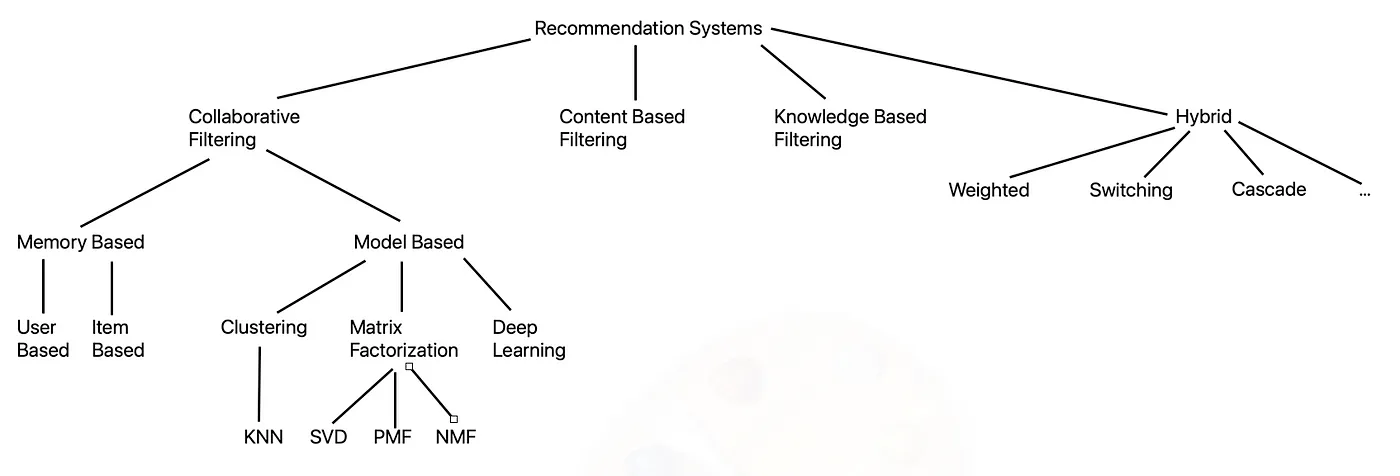

user-based를 선택한 이유 

*   이 추천시스템 형성의 목적: playtime 늘리기
*   그렇다면 target: 아직 많은 게임을 플레이하지 않았고 오래 플레이해보지 않은(즉, 취향이 아직 잡히지 않은) 유저 


**item-based일 때 좀 더 효과가 있을까, 
아니면 user-based일 때 좀 더 효과가 있을까?**







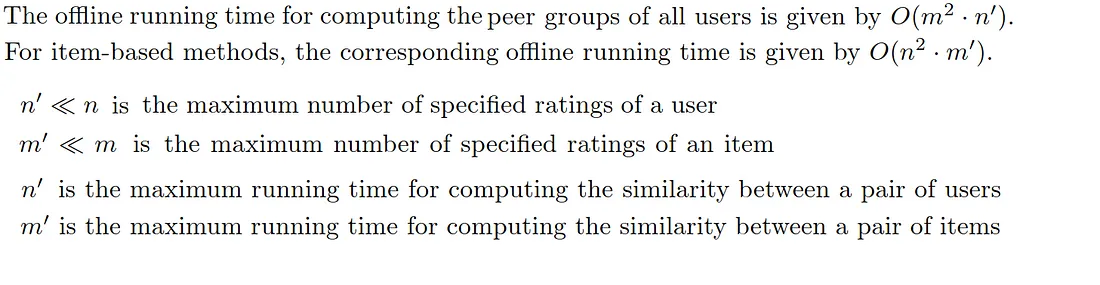

In [50]:
df_cf = df_play_v3.copy()
df_cf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70477 entries, 0 to 70476
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         70477 non-null  int64  
 1   game_title      70477 non-null  object 
 2   behavior_type   70477 non-null  object 
 3   playtime        70477 non-null  float64
 4   playtime_sum_x  70477 non-null  float64
 5   playtime_avg    70477 non-null  float64
 6   rating          70477 non-null  int64  
 7   playtime_sum_y  70477 non-null  float64
 8   Q1              70477 non-null  float64
 9   Q2              70477 non-null  float64
 10  Q3              70477 non-null  float64
 11  Q4              70477 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 7.0+ MB


In [51]:
df_cf = df_cf[['user_id', 'game_title', 'rating']]
df_cf.sample(5)

,user_id,game_title,rating
2309,158561350,Dota 2,3
15584,181453879,The Elder Scrolls V Skyrim,2
27355,127788996,Sid Meier's Civilization V,1
48695,101142088,Star Conflict,5
9653,150405762,Call of Duty Modern Warfare 3,3


In [52]:
df_cf['game_title'].nunique()

3600

In [53]:
df_cf['user_id'].nunique()

11350

item 수 < user 수 이므로 item-based가 더 계산량은 적으려나? 




*   SVD (https://surprise.readthedocs.io/en/stable/index.html) 


```
# 코드로 형식 지정됨
```



*  https://www.kaggle.com/code/sumeet07/game-recommender-system?scriptVersionId=102951282&cellId=39

```
importing pairwise_distance , cosine ,correlation
from sklearn.metrics.pairwise import pairwise_distances,cosine_similarity
from scipy.spatial.distance import cosine,correlation
```




이걸로 하자!!! 
https://towardsdatascience.com/item-based-collaborative-filtering-in-python-91f747200fab

## 피벗테이블 만들기 

In [54]:
df_cf.shape

(70477, 3)

In [55]:
df_cf.isnull().sum()

user_id       0
game_title    0
rating        0
dtype: int64

In [56]:
df_cf.sort_values(by = 'user_id', inplace = True )
df_cf.head()

,user_id,game_title,rating
0,5250,Alien Swarm,3
5383,5250,Portal 2,3
404,5250,Deus Ex Human Revolution,4
5836,5250,Team Fortress 2,1
542,5250,Dota 2,1


In [57]:
df_cf['game_title'].nunique()

3600

In [58]:
df_cf['user_id'].nunique()

11350

In [59]:
%%time 
df = pd.pivot_table(df_cf,                # 피벗할 데이터프레임
                     index = 'game_title',    # 행 위치에 들어갈 열
                     columns = 'user_id',    # 열 위치에 들어갈 열
                     values = 'rating')     # 데이터로 사용할 열

# df = df.reset_index()
# df.index = df.index.droplevel()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3600 entries, 007 Legends to theHunter Primal
Columns: 11350 entries, 5250 to 309903146
dtypes: float64(11350)
memory usage: 311.8+ MB
CPU times: user 1.02 s, sys: 216 ms, total: 1.24 s
Wall time: 1.25 s


In [60]:
df.index.names

FrozenList(['game_title'])

In [61]:
df.shape

(3600, 11350)

In [62]:
df.head()

Output hidden; open in https://colab.research.google.com to view.

In [63]:
%%time 
df = df.fillna(0)
df.head()


Output hidden; open in https://colab.research.google.com to view.

##CF using KNN

### Calculate the Nearest Neighbors 

In [64]:
from sklearn.neighbors import NearestNeighbors

In [65]:
df.values # 행렬 형태 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
## knn으로 cosine similarity 계산 
%%time 
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(df.values)

distances, indices = knn.kneighbors(df.values, n_neighbors=3)

CPU times: user 13.6 s, sys: 508 ms, total: 14.1 s
Wall time: 8.61 s


In [67]:
indices # 각 game과 유사한 game index 2개 

array([[   0,  151, 1120],
       [   1, 1953,   65],
       [   2,  194,   59],
       ...,
       [3597,  147, 3016],
       [3598, 1496, 2070],
       [3599,  877, 1401]])

In [68]:
distances # distance between movies 

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.22044605e-16, 3.14005659e-01, 4.61861765e-01],
       [0.00000000e+00, 3.25800138e-01, 3.27272727e-01],
       ...,
       [0.00000000e+00, 7.18922532e-01, 7.41681491e-01],
       [0.00000000e+00, 7.43619162e-01, 7.99369976e-01],
       [0.00000000e+00, 1.99359231e-01, 1.99359231e-01]])

### Predict a Rating for a game by a user 

In [69]:
games_topten

['Dota 2',
 'Team Fortress 2',
 'Counter-Strike Global Offensive',
 'Unturned',
 'Left 4 Dead 2',
 'Counter-Strike Source',
 'Counter-Strike',
 "Garry's Mod",
 'The Elder Scrolls V Skyrim',
 'Warframe']

In [70]:
%%time
# get the index for game
game = 'Dota 2'
index_for_game = df.index.tolist().index(game)

# find the indices for the similar games
sim_games = indices[index_for_game].tolist()

# distances between game and the similar games
game_distances = distances[index_for_game].tolist()

# the position of game in the list sim_games
id_game = sim_games.index(index_for_game)

# remove game from the list sim_games
sim_games.remove(index_for_game)

# remove game from the list game_distances
game_distances.pop(id_game)

print(f'The Nearest games to {game}: \n{df.index.tolist()[sim_games[0]]}, {df.index.tolist()[sim_games[1]]}\n') # df.index.tolist()[922]
print(f'The Distance from {game}:\n', game_distances)
print()

The Nearest games to Dota 2: 
Counter-Strike Global Offensive, Team Fortress 2

The Distance from Dota 2:
 [0.750619443269801, 0.7960435999254483]

CPU times: user 2.46 ms, sys: 0 ns, total: 2.46 ms
Wall time: 2.69 ms


In [71]:
df.index.tolist().index('0RBITALIS')

1

In [72]:
df.index.tolist()[922]

'Dota 2'

In [73]:
df.head()

Output hidden; open in https://colab.research.google.com to view.

### Build a Recommender


In [74]:
df1 = df.copy()

In [75]:
def recommend_games(user, num_recommended_games):

  print('The list of the games {} Has Played \n'.format(user))

  for m in df[df[user] > 0][user].index.tolist():
    print(m)
  
  print('\n')

  recommended_games = []

  for m in df[df[user] == 0].index.tolist():

    index_df = df.index.tolist().index(m)
    predicted_rating = df1.iloc[index_df, df1.columns.tolist().index(user)]
    recommended_games.append((m, predicted_rating))

  sorted_rm = sorted(recommended_games, key=lambda x:x[1], reverse=True)
  
  print('The list of the Recommended games \n')
  rank = 1
  for recommended_movie in sorted_rm[:num_recommended_games]:
    
    print('{}: {} - predicted rating:{}'.format(rank, recommended_movie[0], recommended_movie[1]))
    rank = rank + 1

In [91]:

# store the original dataset in 'df', and create the copy of df, df1 = df.copy().
def game_recommender(user, num_neighbors, num_recommendation):

  number_neighbors = num_neighbors

  # find the nearest neighbors using NearestNeighbors(n_neighbors=3)
  knn = NearestNeighbors(metric='cosine', algorithm='brute')
  knn.fit(df.values)
  distances, indices = knn.kneighbors(df.values, n_neighbors=number_neighbors)

  user_index = df.columns.tolist().index(user)

  # t: game_title, m: the row number of t in df
  loop = 0
  for m,t in list(enumerate(df.index)):

    # find games without ratings by the user
    if df.iloc[m, user_index] == 0:
      sim_games = indices[m].tolist() # 유저가 플레이하지 않은 게임 m과 비슷한 게임 리스트 
      game_distances = distances[m].tolist() # 유저가 플레이하지 않은 게임 m과 비슷한 다른 게임의 distance 

      # Generally, this is the case: indices[3] = [3 6 7]. The game itself is in the first place.
      # In this case, we take off 3 from the list. Then, indices[3] == [6 7] to have the nearest NEIGHBORS in the list. 
      if m in sim_games:
        id_game = sim_games.index(m)
        sim_games.remove(m)
        game_distances.pop(id_game) 

      else:
        sim_games = sim_games[:number_neighbors-1]
        game_distances = game_distances[:number_neighbors-1]
      
      # game_similarty = 1 - game_distance    
      game_similarity = [1-x for x in game_distances]
      game_similarity_copy = game_similarity.copy()
      
      # print(f'game_similarity_copy: {game_similarity_copy}')
      nominator = 0

      # for each similar game
      for s in range(0, len(game_similarity)):
        if df.iloc[sim_games[s], user_index] == 0: 
          if len(game_similarity_copy) == (number_neighbors - 1):
            game_similarity_copy.pop(s)
          
          else:
            game_similarity_copy.pop(s-(len(game_similarity)-len(game_similarity_copy)))
            
        else: # 유저가 플레이해본 게임이라면 
          nominator = nominator + game_similarity[s]*df.iloc[sim_games[s],user_index]
          # print(f'--nominator updated: {nominator}')

      # print(f'game_similarity_copy: {game_similarity_copy}')
      if len(game_similarity_copy) > 0:
        if sum(game_similarity_copy) > 0:
          predicted_r = nominator/sum(game_similarity_copy)
        
        else:
          predicted_r = 0

      else:
        predicted_r = 0

      df1.iloc[m,user_index] = predicted_r
  
  recommend_games(user, num_recommendation)
      


In [88]:
%%time
user = 99484728
game_recommender(user, 3, 4)

--nominator updated: 0.9102816735979804
--nominator updated: 1.3670858632445846
--nominator updated: 0.3957830885258311
--nominator updated: 0.8158256002982069
--nominator updated: 1.5854884054834812
--nominator updated: 0.37950332627263184
--nominator updated: 1.367420412200345
--nominator updated: 1.2340050310493318
--nominator updated: 1.470195216913078
--nominator updated: 0.8511739446375102
--nominator updated: 0.02505290181863118
--nominator updated: 0.08307333477960421
LOOP IS DONE- 2
The list of the games 99484728 Has Played 

Aliens versus Predator Classic 2000
Counter-Strike Source
Killing Floor
Team Fortress 2


The list of the Recommended games 

1: Counter-Strike Global Offensive - predicted rating:4.0
2: Dota 2 - predicted rating:4.0
3: Garry's Mod - predicted rating:4.0
4: Left 4 Dead 2 - predicted rating:4.0
CPU times: user 15.3 s, sys: 494 ms, total: 15.8 s
Wall time: 9.95 s


In [78]:
df1.iloc[99484728]

IndexError: ignored

In [ ]:
df.values

## CF using ...

In [ ]:
# importing pairwise_distance , cosine ,correlation
from sklearn.metrics.pairwise import pairwise_distances,cosine_similarity
from scipy.spatial.distance import cosine,correlation

In [ ]:
import scipy as sp
import operator

In [ ]:
df2 = df.copy()

In [ ]:
df2.head()

In [ ]:
# converting data into sparse matrix format 
# sparse matrix = 행렬의 값이 대부분 '0'인 행렬
pv_sparse = sp.sparse.csr_matrix(df2.values)

희소행렬을 저장하는 자료구조 4가지에는 



(a) Dictionary of keys(DOK): key (행번호, 열번호) 대 value (데이터) 매핑

(b) List of lists (LIL): 링크드 리스트 알고리즘을 이용한 저장 기법, 내용의 추가와 삭제가 용이하지만 CSR 대비 메모리 낭비가 큼

(c) Coordinate list (COO): (행, 열, 값) 튜플 목록 저장

(d) **Compressed sparse row (CSR)**: 가로의 순서대로 재정렬하는 방법으로 행에 관여하여 정리 압축



In [ ]:
print(pv_sparse)

In [ ]:
item_simi = cosine_similarity(pv_sparse) # IB CF?: 제목행: user_id 
user_simi = cosine_similarity(pv_sparse.T) # UB CF?: 제목행: game_title  

In [ ]:
## inserting similarity matrix into a dataframe object
# item similarity dataframe: # 
df_item = pd.DataFrame(item_simi,index = df2.index ,columns = df2.index)

# User_similarity dataframe # 
df_user = pd.DataFrame(user_simi , index= df2.columns,columns=df2.columns)

In [ ]:
df_item.head() # item 간 유사성

In [ ]:
df_user.head() # 유저 간 유사성

In [ ]:
# function which will gives the user having similar values:
def user_id(user):
    if user not in df2.columns:
        print('No data available for this user {}'.format(user))
    sim_val = df_user.sort_values(by =user,ascending=False).loc[:,user].tolist()[1:6]
    sim_user = df_user.sort_values(by = user,ascending=False).index[1:6]
    zipped = zip(sim_user,sim_val)
    for user, sim in zipped:
        print('user #{0},similarity values :{1:.2f}'.format(user,sim))

In [ ]:
user_id(99484728)

In [ ]:
# Write a function which will gives the top 5 games having highest cosine similarity 
def top_games(game):
    count = 1
    print('similar game to {} include \n'.format(game))
    for item in df_item .sort_values(ascending=False,by = game).index[1:6]:
        print('NO.{} = {}'.format(count,item))
        count+=1

In [ ]:
# 유사한 game 찾기 

def recommend_game(user): 

  print('The list of the games {} Has Played \n'.format(user))

  # 해당 유저가 플레이한 game_title, rating 출력 
  temp = pd.DataFrame(df2[df2[user] > 0][user]).reset_index().sort_values(by = user, ascending=False)

  n = temp.shape[0]
  game_list = []
  top_rating = -1 
  for i in range(0, n): 
    game_temp = temp.iloc[i]['game_title']
    rating = temp.iloc[i][user]

    if i == 0: 
      game_list.append(game_temp)
      top_rating = rating 
    else: 
      if rating >= top_rating: 
        game_list.append(game_temp)

    print(f'[{game_temp}] - rating {rating}')

  print('\n')

  for game in game_list: 
    top_games(game)


In [ ]:
pd.DataFrame(df2[df2[99484728] > 0][99484728]).reset_index()

In [ ]:
user = 99484728
temp = pd.DataFrame(df2[df2[user] > 0][user]).reset_index().sort_values(by = user, ascending=False)
temp.iloc[0]['game_title']

In [ ]:
recommend_game(99484728)

In [ ]:
# write a function which will construct a list of list containing the highest rated games per similar user:
# return the name of the game along with along with frequency it appears in the list:
def simi_user_recs(user):
    if user not in df2.columns:
        print('No data available for this user {}'.format(user))
    sim_user = df_user.sort_values(by = user,ascending=False).index[1:11]
    best = []
    most_common = {}
    
    for i in sim_user:
        max_scorce = df2.loc[:,i].max()
        best.append(df2[df2.loc[:,i] == max_scorce].index.tolist())
    for i in range(len(best)):
        for j in best[i]:
                   if j in most_common:
                       most_common[j] =+1
                   else :
                       most_common[j] =1
    sorted_item = sorted(most_common.items(),key=operator.itemgetter(1),reverse=True)
    return sorted_item[:6]

In [ ]:
simi_user_recs(100519466)